<a href="https://colab.research.google.com/github/Diwash17/5CS037-Final-Portfolio-WHR-2024-/blob/main/2407736_DiwashAdhikari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **“Analysis of the World Happiness Report: A Data-Driven Exploration of Predicting and Classifying Happiness Scores Across Populations Based on Socio-Economic and Environmental Factors, with the Categorization of Countries into High and Low Happiness Groups.”**

Importing all the modules

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_regression, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from IPython.display import display, Markdown

Data Understanding and Data Expolaration

In [198]:
url = "https://raw.githubusercontent.com/Diwash17/5CS037-Final-Portfolio-WHR-2024-/main/WHR-2024.csv"
World_Happiness_Report = pd.read_csv(url)
World_Happiness_Report.head(2)

,Unnamed: 0,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,happiness category
0,0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High


In [199]:
World_Happiness_Report.drop('Unnamed: 0', axis=1, inplace=True)

In [200]:
# Renaming columns to make them Python-friendly and more descriptive using Snake case
World_Happiness_Report.rename(columns={'Country name':'country_name', 'Ladder score':'ladder_score',
                                       'upperwhisker':'upper_whisker','lowerwhisker':'lower_whisker','Explained by: Log GDP per capita':'log_gdp_per_capita',
                                       'Explained by: Social support':'social_support', 'Explained by: Healthy life expectancy':'healthy_life_expectancy',
                                       'Explained by: Freedom to make life choices':'freedom_to_make_life_choices',
                                       'Explained by: Generosity':'generosity','Explained by: Perceptions of corruption':'perceptions_of_corruption','Dystopia + residual':'dystopia_residual','happiness category':'happiness_category'},
                              inplace=True)


In [201]:
World_Happiness_Report.head()

,country_name,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,happiness_category
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


In [202]:
World_Happiness_Report.shape

(143, 12)

In [203]:
World_Happiness_Report.columns.tolist()

['country_name',
 'ladder_score',
 'upper_whisker',
 'lower_whisker',
 'log_gdp_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'freedom_to_make_life_choices',
 'generosity',
 'perceptions_of_corruption',
 'dystopia_residual',
 'happiness_category']

In [204]:
World_Happiness_Report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  143 non-null    object 
 1   ladder_score                  143 non-null    float64
 2   upper_whisker                 143 non-null    float64
 3   lower_whisker                 143 non-null    float64
 4   log_gdp_per_capita            140 non-null    float64
 5   social_support                140 non-null    float64
 6   healthy_life_expectancy       140 non-null    float64
 7   freedom_to_make_life_choices  140 non-null    float64
 8   generosity                    140 non-null    float64
 9   perceptions_of_corruption     140 non-null    float64
 10  dystopia_residual             140 non-null    float64
 11  happiness_category            143 non-null    object 
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


Data Cleaning

In [205]:
World_Happiness_Report.isnull().sum()

,0
country_name,0
ladder_score,0
upper_whisker,0
lower_whisker,0
log_gdp_per_capita,3
social_support,3
healthy_life_expectancy,3
freedom_to_make_life_choices,3
generosity,3
perceptions_of_corruption,3


In [206]:
numeric_columns = World_Happiness_Report.select_dtypes(include=['float64', 'int64']).columns

In [207]:
corr=World_Happiness_Report[numeric_columns].corr()
corr

,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual
ladder_score,1.000000,0.999678,0.999697,0.768504,0.813542,0.759659,0.644451,0.130038,0.451829,0.533542
upper_whisker,0.999678,1.000000,0.998750,0.761804,0.811550,0.751042,0.646309,0.129602,0.448847,0.542267
lower_whisker,0.999697,0.998750,1.000000,0.774531,0.814992,0.767506,0.642291,0.130446,0.454480,0.524816
log_gdp_per_capita,0.768504,0.761804,0.774531,1.000000,0.726843,0.830256,0.414886,-0.059405,0.444227,-0.029118
social_support,0.813542,0.811550,0.814992,0.726843,1.000000,0.706924,0.484641,0.079466,0.250870,0.159484
healthy_life_expectancy,0.759659,0.751042,0.767506,0.830256,0.706924,1.000000,0.401082,0.007148,0.399026,0.051538
freedom_to_make_life_choices,0.644451,0.646309,0.642291,0.414886,0.484641,0.401082,1.000000,0.224323,0.344197,0.250792
generosity,0.130038,0.129602,0.130446,-0.059405,0.079466,0.007148,0.224323,1.000000,0.172666,0.036423
perceptions_of_corruption,0.451829,0.448847,0.454480,0.444227,0.250870,0.399026,0.344197,0.172666,1.000000,0.000964
dystopia_residual,0.533542,0.542267,0.524816,-0.029118,0.159484,0.051538,0.250792,0.036423,0.000964,1.000000


I have used KNN imputer(in default in sklearn it handels with mean) for  cleaning features with high correlation and use median for feature with low correlation.

In [208]:
knn_columns = ['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices'
]

In [209]:
median_columns = ['generosity', 'perceptions_of_corruption', 'dystopia_residual']

In [210]:
imputer = KNNImputer(n_neighbors=5)

In [211]:
World_Happiness_Report[knn_columns] = imputer.fit_transform(World_Happiness_Report[knn_columns])

In [212]:
World_Happiness_Report[median_columns] = World_Happiness_Report[median_columns].fillna(World_Happiness_Report[median_columns].median())

In [213]:
World_Happiness_Report.isnull().sum()

,0
country_name,0
ladder_score,0
upper_whisker,0
lower_whisker,0
log_gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0


Descriptive stastistics

In [214]:
World_Happiness_Report.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ladder_score,143.0,5.527580,1.170717,1.721,4.7260,5.7850,6.4160,7.741
upper_whisker,143.0,5.641175,1.155008,1.775,4.8455,5.8950,6.5075,7.815
lower_whisker,143.0,5.413972,1.187133,1.667,4.6060,5.6740,6.3190,7.667
log_gdp_per_capita,143.0,1.378807,0.420584,0.000,1.0790,1.4030,1.7330,2.141
social_support,143.0,1.134329,0.329777,0.000,0.9245,1.2170,1.3770,1.617
healthy_life_expectancy,143.0,0.520886,0.163171,0.000,0.4000,0.5490,0.6440,0.857
freedom_to_make_life_choices,143.0,0.620621,0.160766,0.000,0.5310,0.6320,0.7340,0.863
generosity,143.0,0.146066,0.072675,0.000,0.0925,0.1365,0.1915,0.401
perceptions_of_corruption,143.0,0.153416,0.124991,0.000,0.0690,0.1205,0.1910,0.575
dystopia_residual,143.0,1.577353,0.531842,-0.073,1.3170,1.6445,1.8795,2.998


In [215]:
World_Happiness_Report.describe(include=['object'])

,country_name,happiness_category
count,143,143
unique,143,2
top,Finland,High
freq,1,72


In [216]:
skewness = World_Happiness_Report[['ladder_score','log_gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices',
                                   'generosity','perceptions_of_corruption','dystopia_residual']].skew()

skewness

,0
ladder_score,-0.521820
log_gdp_per_capita,-0.512415
social_support,-1.002629
healthy_life_expectancy,-0.551754
freedom_to_make_life_choices,-1.029456
generosity,0.678122
perceptions_of_corruption,1.554121
dystopia_residual,-0.615943


from skewness we can check distribution of data in features.
Negative Skewness: Left-skewed distribution (social_support, freedom_to_make_life_choices,dystopia_residual)
Positive Skewness: Right-skewed distribution (generosity, perceptions_of_corruption)

In [217]:
kurt_values = World_Happiness_Report[['ladder_score','log_gdp_per_capita',
                                      'social_support', 'healthy_life_expectancy',
                                      'freedom_to_make_life_choices', 'generosity',
                                      'perceptions_of_corruption', 'dystopia_residual']].kurtosis()
kurt_values

,0
ladder_score,-0.181577
log_gdp_per_capita,-0.291465
social_support,0.586178
healthy_life_expectancy,-0.316808
freedom_to_make_life_choices,1.397587
generosity,0.932171
perceptions_of_corruption,2.139704
dystopia_residual,0.886748


In [218]:
ladder_score_range = World_Happiness_Report['ladder_score'].max() - World_Happiness_Report['ladder_score'].min()
print(f'Range of ladder score: {ladder_score_range:.3f}')

Range of ladder score: 6.020


In [219]:
ladder_score_cv = (World_Happiness_Report['ladder_score'].std()/ World_Happiness_Report['ladder_score'].mean())
print(f'Coefficient of variation of ladder score: {ladder_score_cv:.3f}')

Coefficient of variation of ladder score: 0.212


In [220]:
happiness_counts = World_Happiness_Report['happiness_category'].value_counts()
happiness_counts

,count
happiness_category,
High,72
Low,71


**Data Visualization**

Univariant Analysis

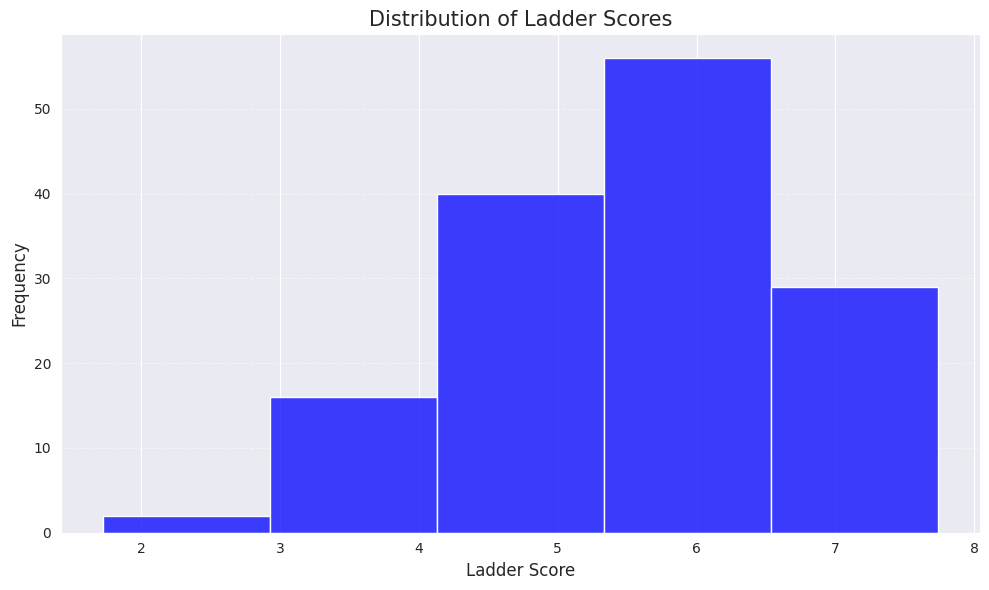

In [221]:
plt.figure(figsize=(10, 6))
sns.histplot(World_Happiness_Report["ladder_score"], bins=5, color='blue')
plt.title("Distribution of Ladder Scores", fontsize=15)
plt.xlabel("Ladder Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

skewness of ladder score is -0.521820 we can say its slightly left-skewed (Mean < Median < Mode) and kurtosis of - 0.181577 says it has lighter tails than normal distribution. This histogram is unimodal it has only one peak points.

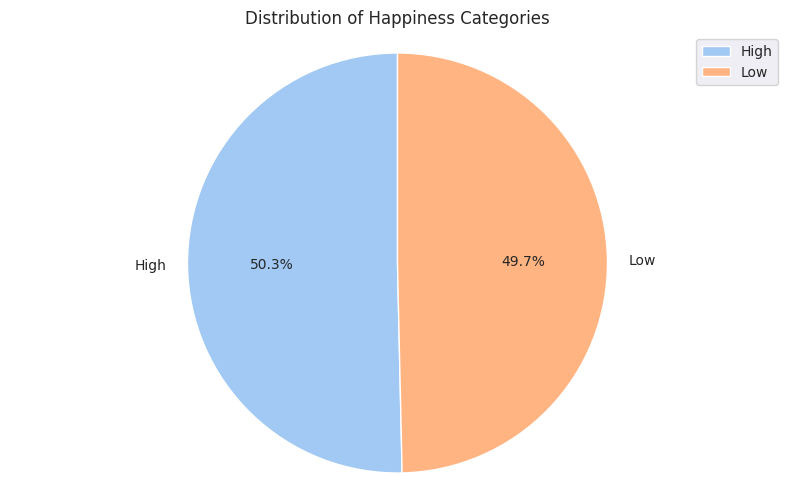

In [222]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
plt.pie(happiness_counts, labels=happiness_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Happiness Categories')
plt.legend()
plt.show()

Class is balance for Happiness category

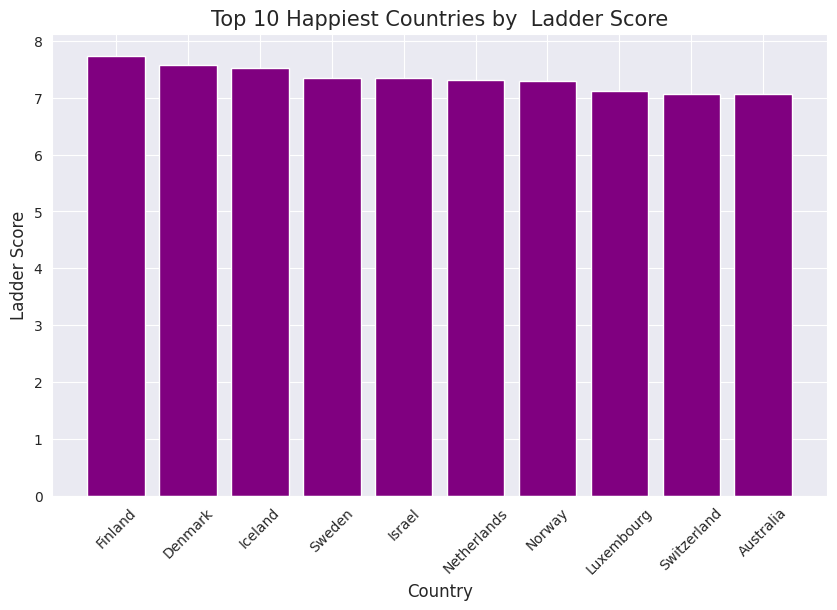

In [223]:
top_10_happiest = World_Happiness_Report.nlargest(10, 'ladder_score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['country_name'], top_10_happiest['ladder_score'], color='purple')
plt.title('Top 10 Happiest Countries by  Ladder Score',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Ladder Score',fontsize=12)
plt.xticks(rotation=45)
plt.show()

Finland is the happiest country and most happiest country are mostly from europen region

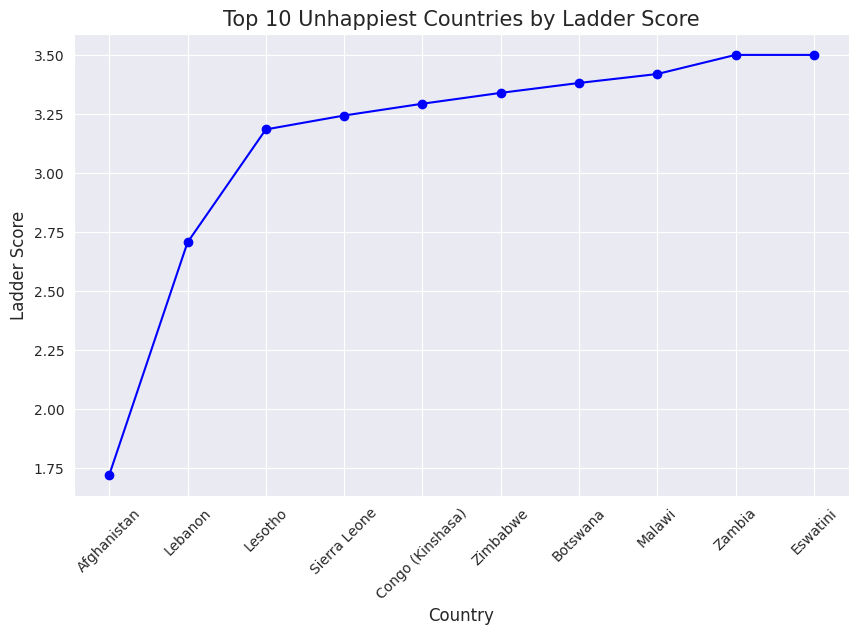

In [224]:
top_10_unhappiest = World_Happiness_Report.nsmallest(10, 'ladder_score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['country_name'], top_10_unhappiest['ladder_score'], marker='o', color='blue')
plt.title('Top 10 Unhappiest Countries by Ladder Score',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Ladder Score',fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Afghanistan is the unhappiest country in the world and other most of are from african region

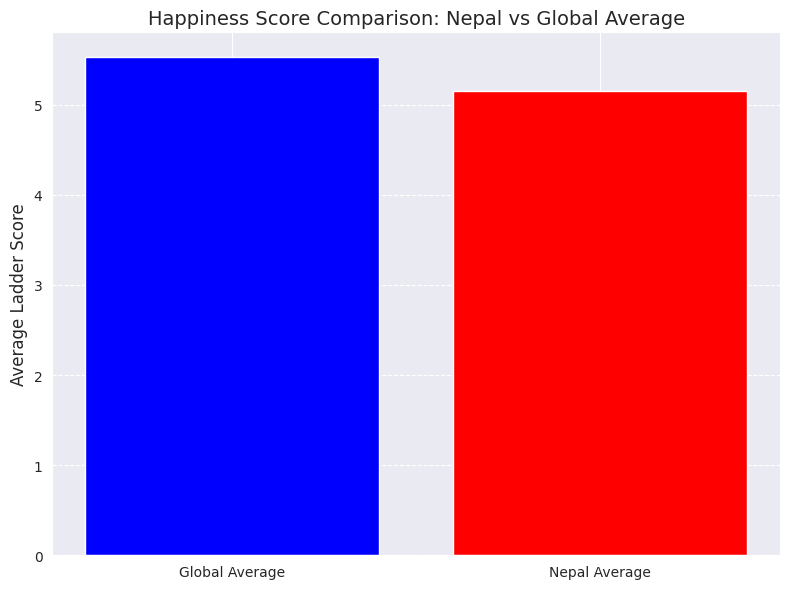

In [225]:
country = 'Nepal'
df_country = World_Happiness_Report[World_Happiness_Report['country_name'] == country]

# Calculate averages
global_avg_life_ladder = World_Happiness_Report['ladder_score'].mean()
country_avg_life_ladder = df_country['ladder_score'].mean()

# Create bar plot for comparison
plt.figure(figsize=(8, 6))
plt.bar(['Global Average', f'{country} Average'], [global_avg_life_ladder, country_avg_life_ladder], color=['blue', 'red'])

# Add title and labels
plt.title(f'Happiness Score Comparison: {country} vs Global Average', fontsize=14)
plt.ylabel('Average Ladder Score', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

The bar chart compares Nepal’s average happiness score with the
global average. Nepal’s score is slightly lower than the global average, indicating that overall
happiness levels in Nepal are below the global benchmark but not significantly different

Bivariate analysis

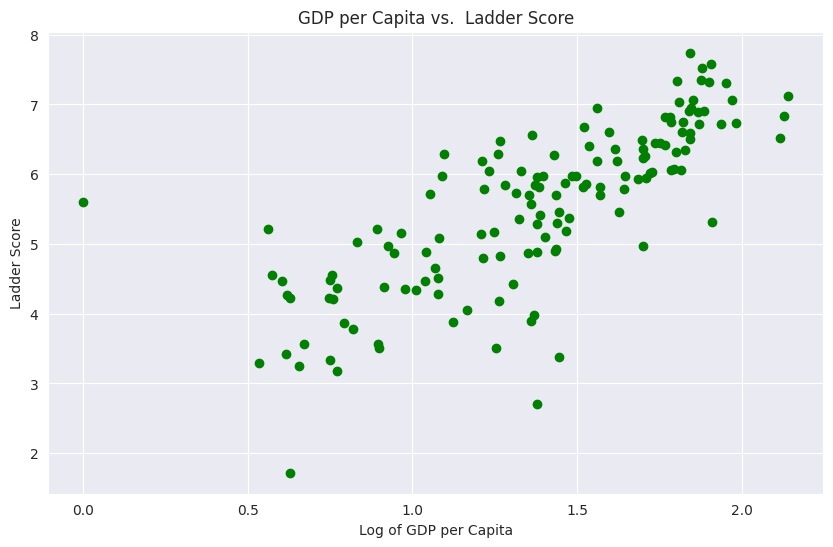

In [226]:
plt.figure(figsize=(10, 6))
plt.scatter(World_Happiness_Report['log_gdp_per_capita'], World_Happiness_Report['ladder_score'], color='green')
plt.title('GDP per Capita vs.  Ladder Score')
plt.xlabel('Log of GDP per Capita')
plt.ylabel('Ladder Score')
plt.grid(True)
plt.show()

Ladder score has high correlation with log gdp per capita and is one of the most important feature in predicting ladder score

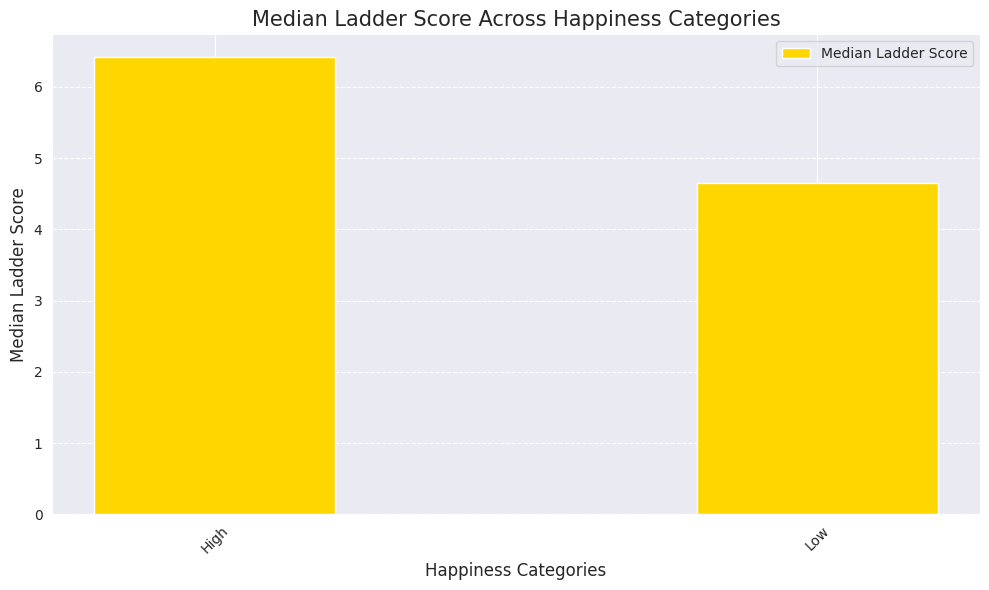

In [227]:
categories = World_Happiness_Report['happiness_category'].unique()
medians = World_Happiness_Report.groupby('happiness_category')['ladder_score'].median()

x = np.arange(len(categories))  # Number of categories
width = 0.4  # Width of each bar

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x, medians, width, color="gold", label="Median Ladder Score")

# Adding details
plt.title("Median Ladder Score Across Happiness Categories", fontsize=15)
plt.xlabel("Happiness Categories", fontsize=12)
plt.ylabel("Median Ladder Score", fontsize=12)
plt.xticks(x, categories, fontsize=10, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

The Bargraph plot shows that countries categorized as ‘’High” in happiness have a significantly higher median ladder score than those in the “Low” category, highlighting a clear
disparity in happiness levels.

Outlier detection and Boxplot

In [228]:
ladder_score_q1 = World_Happiness_Report['ladder_score'].quantile(0.25)
ladder_score_q3 = World_Happiness_Report['ladder_score'].quantile(0.75)
ladder_score_iqr = ladder_score_q3 - ladder_score_q1

In [229]:
ladder_score_lower_bound = ladder_score_q1 - 1.5*ladder_score_iqr
ladder_score_lower_bound

2.1909999999999994

In [230]:
ladder_score_upper_bound = ladder_score_q3 + 1.5*ladder_score_iqr
ladder_score_upper_bound

8.951

In [231]:
gdp_q1 = World_Happiness_Report['log_gdp_per_capita'].quantile(0.25)
gdp_q3 = World_Happiness_Report['log_gdp_per_capita'].quantile(0.75)
gdp_iqr = gdp_q3 - gdp_q1

In [232]:
gdp_lower_bound = gdp_q1 - 1.5 * gdp_iqr
gdp_lower_bound

0.09800000000000031

In [233]:
gdp_upper_bound = gdp_q3 + 1.5 * gdp_iqr
gdp_upper_bound

2.714

In [234]:
social_support_q1= World_Happiness_Report['social_support'].quantile(0.25)
social_support_q3 = World_Happiness_Report['social_support'].quantile(0.75)
social_support_iqr = social_support_q3 - social_support_q1

In [235]:
social_support_lower_bound = social_support_q1 - 1.5 * social_support_iqr
social_support_lower_bound

0.24575000000000025

In [236]:
social_support_upper_bound = social_support_q3 + 1.5 * social_support_iqr
social_support_upper_bound

2.0557499999999997

In [237]:
outliers_ladder_gdp = World_Happiness_Report[
    (World_Happiness_Report["ladder_score"] < ladder_score_lower_bound) |
    (World_Happiness_Report["ladder_score"] > ladder_score_upper_bound) |
    (World_Happiness_Report["log_gdp_per_capita"] < gdp_lower_bound) |
    (World_Happiness_Report["log_gdp_per_capita"] > gdp_upper_bound)
]


print(f"Number of outliers based on ladder_score & log_gdp_per_capita: {len(outliers_ladder_gdp)}")
outliers_ladder_gdp

Number of outliers based on ladder_score & log_gdp_per_capita: 2


,country_name,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,happiness_category
78,Venezuela,5.607,5.725,5.489,0.000,1.321,0.491,0.518,0.192,0.086,2.998,Low
142,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


Venezuela is the outlier of log gdp per capita

In [238]:
outliers_ladder_social = World_Happiness_Report[
    (World_Happiness_Report["ladder_score"] < ladder_score_lower_bound) |
    (World_Happiness_Report["ladder_score"] > ladder_score_upper_bound) |
    (World_Happiness_Report["social_support"] < social_support_lower_bound) |
    (World_Happiness_Report["social_support"] > social_support_upper_bound)
]

# Print the number of outliers detected for ladder_score & social_support
print(f"Number of outliers based on ladder_score & social_support: {len(outliers_ladder_social)}")
outliers_ladder_social

Number of outliers based on ladder_score & social_support: 2


,country_name,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,happiness_category
115,Benin,4.377,4.510,4.245,0.914,0.128,0.284,0.567,0.112,0.252,2.121,Low
142,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


Benin is the outliers of social support

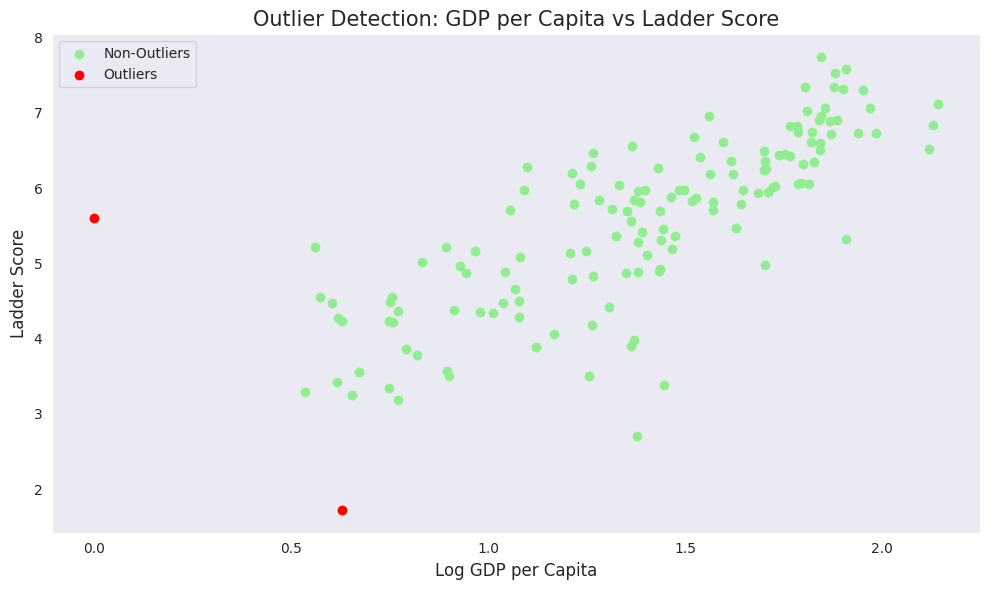

In [239]:
plt.figure(figsize=(10, 6))
plt.scatter(World_Happiness_Report["log_gdp_per_capita"], World_Happiness_Report["ladder_score"], color="lightgreen", label="Non-Outliers")
plt.scatter(outliers_ladder_gdp["log_gdp_per_capita"], outliers_ladder_gdp["ladder_score"], color="red", label="Outliers")
plt.title("Outlier Detection: GDP per Capita vs Ladder Score", fontsize=15)
plt.xlabel("Log GDP per Capita", fontsize=12)
plt.ylabel("Ladder Score", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

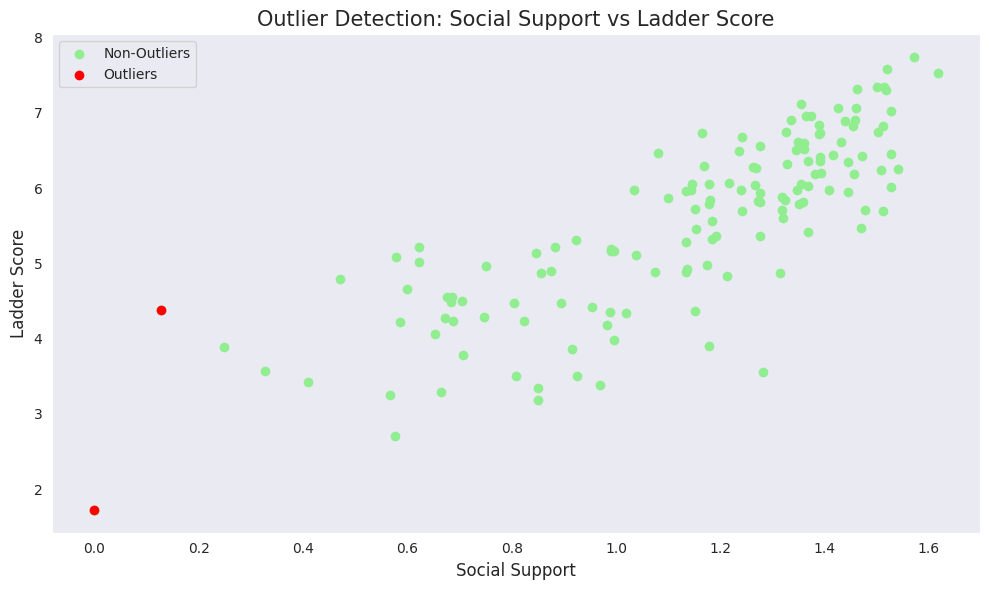

In [240]:
plt.figure(figsize=(10, 6))
plt.scatter(World_Happiness_Report["social_support"], World_Happiness_Report["ladder_score"], color="lightgreen", label="Non-Outliers")
plt.scatter(outliers_ladder_social["social_support"], outliers_ladder_social["ladder_score"], color="red", label="Outliers")
plt.title("Outlier Detection: Social Support vs Ladder Score", fontsize=15)
plt.xlabel("Social Support", fontsize=12)
plt.ylabel("Ladder Score", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

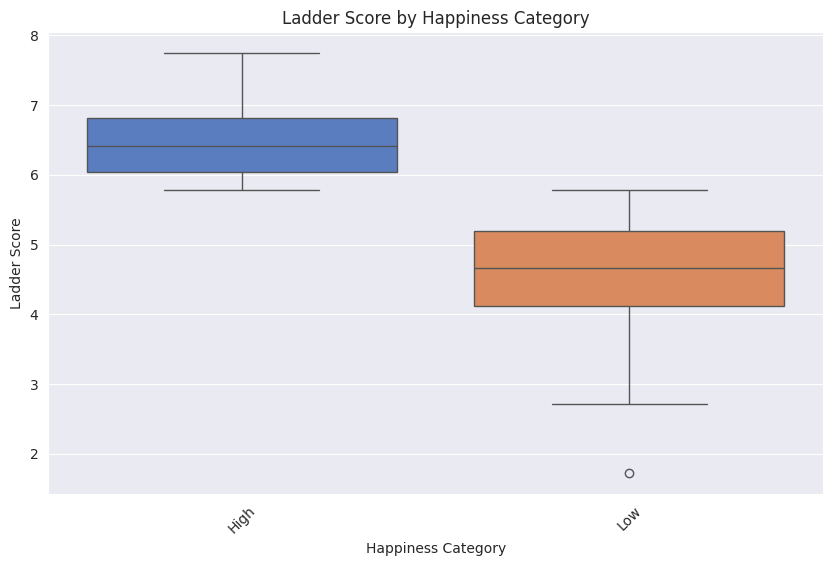

In [241]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='happiness_category', y='ladder_score', data=World_Happiness_Report, palette='muted')
plt.title('Ladder Score by Happiness Category')
plt.xlabel('Happiness Category')
plt.ylabel('Ladder Score')
plt.xticks(rotation=45)
plt.show()

Afghanistan is the outlier which is of low happiness category

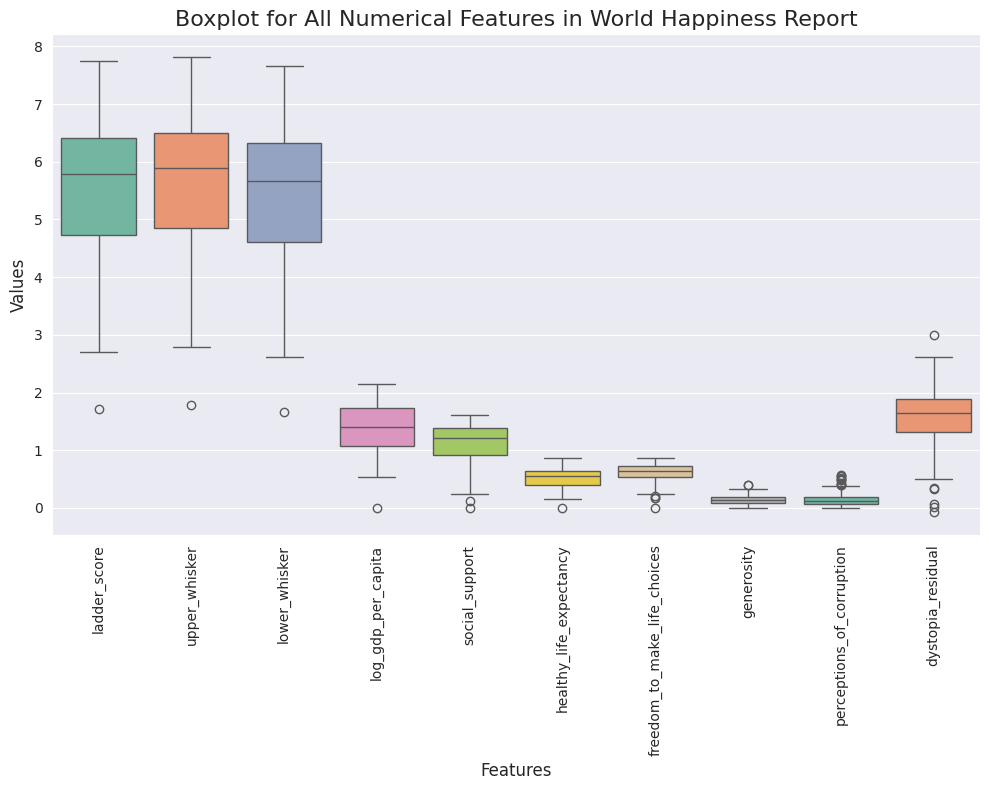

In [242]:
# Create a boxplot for all numerical columns in the World_Happiness_Report DataFrame
plt.figure(figsize=(10, 8))
sns.boxplot(data=World_Happiness_Report.select_dtypes(include=['float64', 'int64']), palette='Set2')

# Add title and labels
plt.title("Boxplot for All Numerical Features in World Happiness Report", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [243]:
scaler = RobustScaler()
World_Happiness_Report[["ladder_score", "log_gdp_per_capita", "social_support",
                        'healthy_life_expectancy', 'freedom_to_make_life_choices',
                        'generosity', 'perceptions_of_corruption', 'dystopia_residual']] = scaler.fit_transform(
    World_Happiness_Report[["ladder_score", "log_gdp_per_capita", "social_support",
                            'healthy_life_expectancy', 'freedom_to_make_life_choices',
                            'generosity', 'perceptions_of_corruption', 'dystopia_residual']])

 Instead of dropping
outliers since the dataset only contains 143 rows, robust scaling was performed on outliers
detected features. Robust scaling is resistant to outliers; it uses IQR and median for scaling

Multivariant Analysis

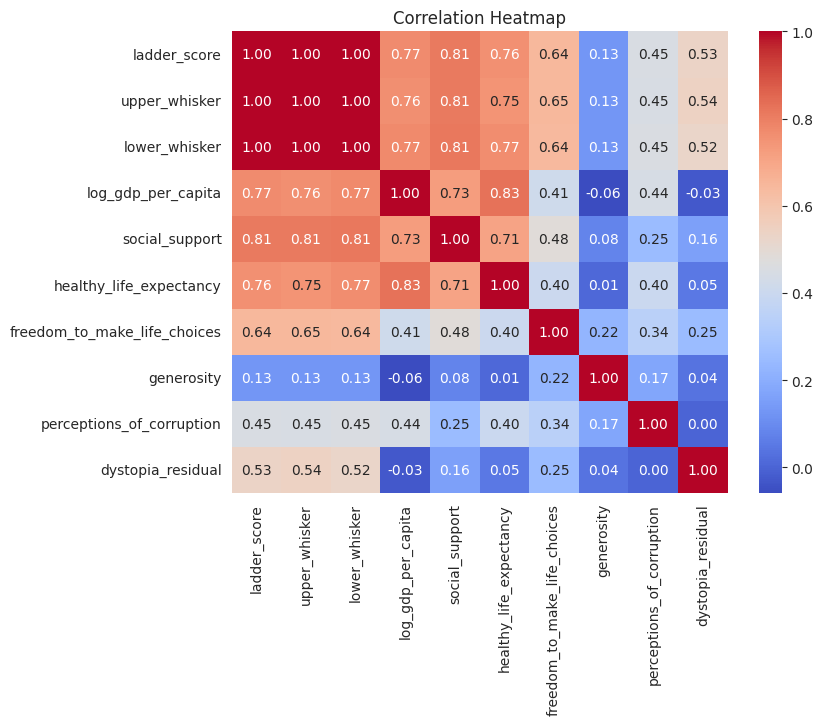

In [244]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap showed that happiness score has a strong positive
relationship with GDP (0.77), social support(0.81), and healthy life expectancy(0.76), indicating
that economic prosperity, social connections, and health played important impacts in happiness.
In contrast, generosity(0.13) and perceptions of corruption(0.45) have weaker, suggesting they
play a smaller role in determining overall happiness.

**Data Transformation**

In [245]:
numeric_columns = ['ladder_score','log_gdp_per_capita','social_support','healthy_life_expectancy','freedom_to_make_life_choices',
                  'generosity','perceptions_of_corruption','dystopia_residual']

Standarization using Z-score

In [246]:
for col in numeric_columns:
        World_Happiness_Report[col] = (World_Happiness_Report[col] - World_Happiness_Report[col].mean()) / World_Happiness_Report[col].std()

Encoding using lamda function

In [247]:
World_Happiness_Report['binary_happiness'] = World_Happiness_Report['happiness_category'].apply(lambda x: 1 if x == 'High' else 0)

upper whisker and lower whisker are whisker of ladder score and it doesnot make sense and similarly country name also doesnot make sense it just increases complexity

In [248]:
World_Happiness_Report.drop(['upper_whisker','lower_whisker','country_name', 'happiness_category'],axis=1,inplace=True)

In [249]:
print(World_Happiness_Report.columns)

Index(['ladder_score', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia_residual', 'binary_happiness'],
      dtype='object')


**Classification**

In [250]:
X = World_Happiness_Report.drop('binary_happiness', axis=1)
y = World_Happiness_Report['binary_happiness']

Train Test Split

In [251]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f'The shape of X_train{X_train.shape}')
print(f'The shape of X_test{X_test.shape}')
print(f'The shape of y_train{y_train.shape}')
print(f'The shape of y_test{y_test.shape}')

The shape of X_train(114, 8)
The shape of X_test(29, 8)
The shape of y_train(114,)
The shape of y_test(29,)


Build a Model from Scratch

Logistic Regression using Sigmoid Function(for Binary Classification)

In [252]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [253]:
def test_logistic_function():
    """
    Test cases for the sigmoid function.
    """

    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(sigmoid(x_scalar), 3) == expected_output_scalar, f"Test failed for scalar input: {sigmoid(x_scalar)}"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(sigmoid(x_pos), 3) == expected_output_pos, f"Test failed for positive scalar input: {sigmoid(x_pos)}"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(sigmoid(x_neg), 3) == expected_output_neg, f"Test failed for negative scalar input: {sigmoid(x_neg)}"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])  # Adjusted expected values rounded to 3 decimals
    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(sigmoid(x_array), 3) == expected_output_array), f"Test failed for numpy array input: {sigmoid(x_array)}"

    print("All tests passed!")

# Run the test case
test_logistic_function()

All tests passed!


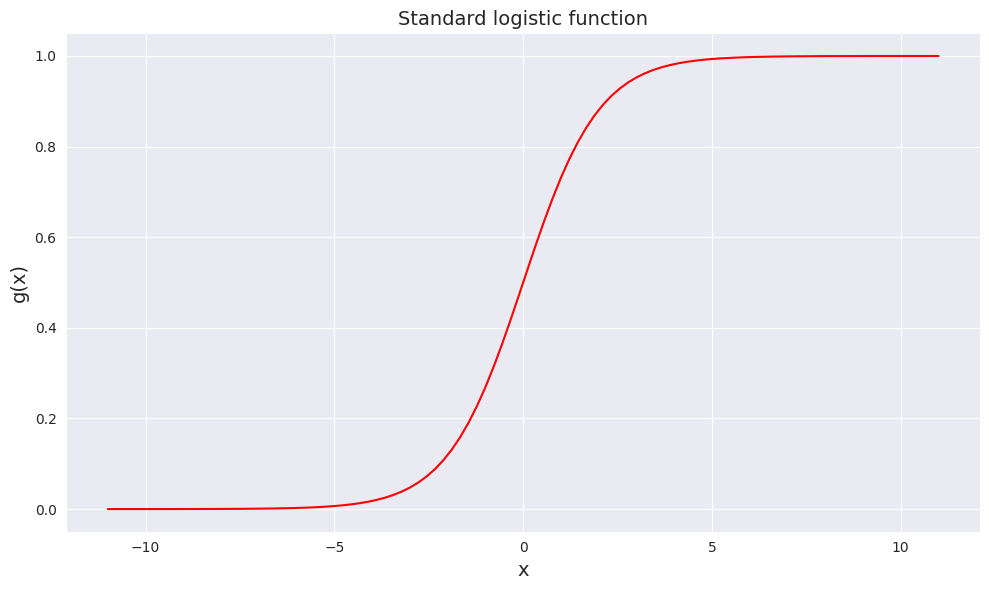

In [254]:
plt.figure(figsize = (10, 6))
x = np.linspace(-11, 11, 100)
plt.plot(x, sigmoid(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

In [255]:
# Loss Function
def calculate_loss(X, y, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    # Binary cross-entropy loss
    loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    return loss

In [256]:
# Gradient Descent
def gradient_descent(X, y, y_pred):
    n_samples = len(y)
    dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
    db = (1 / n_samples) * np.sum(y_pred - y)
    return dw, db

In [257]:
def logistic_regression(X, y, lr=0.01, epochs=1000):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    # List to store the loss at each epoch
    loss_history = []

    # Gradient Descent Loop
    for epoch in range(epochs):
        # Compute predictions
        predictions = sigmoid(np.dot(X, weights) + bias)

        # Calculate gradients
        dw, db = gradient_descent(X, y, predictions)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        # Calculate and store the loss
        loss = calculate_loss(X, y, weights, bias)
        loss_history.append(loss)

        # Optionally print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias, loss_history

In [258]:
# Prediction Function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.array([1 if i > 0.5 else 0 for i in y_pred])

In [259]:
def evaluate(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

In [260]:
weights, bias, loss_history = logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

Epoch 0: Loss = 0.6865
Epoch 100: Loss = 0.3852
Epoch 200: Loss = 0.3020
Epoch 300: Loss = 0.2618
Epoch 400: Loss = 0.2373
Epoch 500: Loss = 0.2203
Epoch 600: Loss = 0.2076
Epoch 700: Loss = 0.1975
Epoch 800: Loss = 0.1892
Epoch 900: Loss = 0.1822


In [261]:
# Make Predictions
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

In [262]:
# Evaluate the Model
train_metrics = evaluate(y_train, y_train_pred)
test_metrics = evaluate(y_test, y_test_pred)

In [263]:
# Calculate Loss
train_loss = calculate_loss(X_train, y_train, weights, bias)
test_loss = calculate_loss(X_test, y_test, weights, bias)

In [264]:
# Print Metrics
print("Train Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Train Loss: {train_loss:.4f}")

Train Metrics:
Accuracy: 0.9386
Precision: 0.8889
Recall: 1.0000
F1 Score: 0.9412
Train Loss: 0.1763


In [265]:
print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Metrics:
Accuracy: 0.9655
Precision: 0.9412
Recall: 1.0000
F1 Score: 0.9697
Test Loss: 0.1776


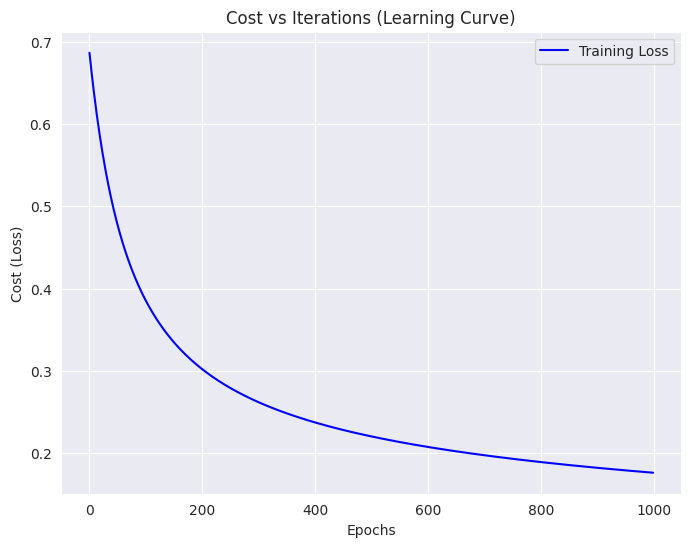

In [266]:
# Plot the Loss vs Epochs (Learning Curve)
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label="Training Loss", color='blue')
plt.title('Cost vs Iterations (Learning Curve)')
plt.xlabel('Epochs')
plt.ylabel('Cost (Loss)')
plt.legend()
plt.grid(True)
plt.show()


In [267]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots the confusion matrix using Seaborn heatmap with custom labels.

    Args:
        y_true (np.array): True labels (0 for Low, 1 for High).
        y_pred (np.array): Predicted labels (0 for Low, 1 for High).
    """
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    class_labels = ["Low", "High"]  # Mapping: 0 -> Low, 1 -> High

    # Create a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

### Confusion Matrix for Training Set:

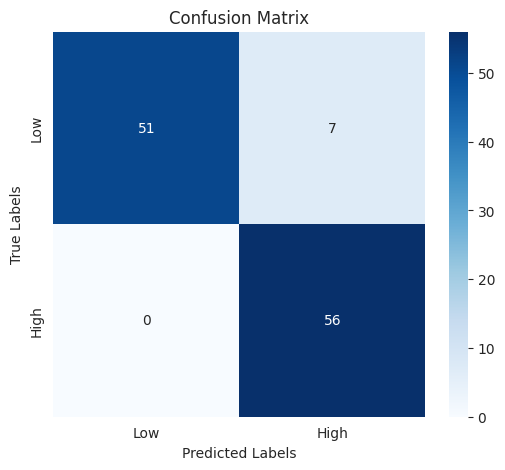

In [268]:
display(Markdown("### Confusion Matrix for Training Set:"))
plot_confusion_matrix(y_train, y_train_pred)

### Confusion Matrix for Test Set:

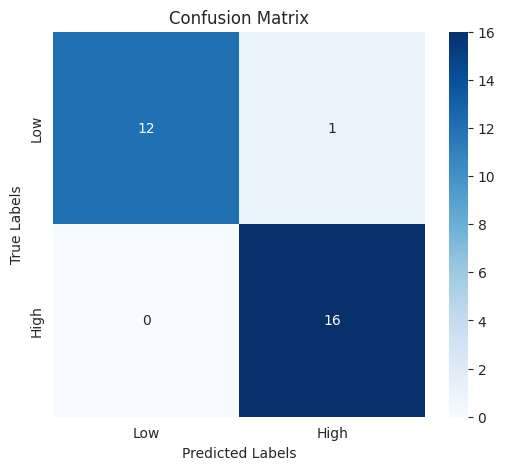

In [269]:
display(Markdown("### Confusion Matrix for Test Set:"))
plot_confusion_matrix(y_test, y_test_pred)

Primary model

Model -1

In [270]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)
print(f'Accuracy on training set: {acc_train}')
print(f'Classification Report on training set:\n{class_report_train}')
print(f'Accuracy on test set: {acc_test}')
print(f'Classification Report on test set:\n{class_report_test}')
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix on training set:\n{cm_train}')
print(f'Confusion Matrix on test set:\n{cm_test}')


Accuracy on training set: 0.9649122807017544
Classification Report on training set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.95      0.98      0.96        56

    accuracy                           0.96       114
   macro avg       0.97      0.97      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy on test set: 0.9655172413793104
Classification Report on test set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

Confusion Matrix on training set:
[[55  3]
 [ 1 55]]
Confusion Matrix on test set:
[[12  1]
 [ 0 16]]


Class 0(low): Perfect 1.00 precision, meaning when the model predicted 0(low), it was always correct.

Class 1: 100% recall, meaning all actual class 1 (high)instances were correctly identified.

Model2

Accuracy on training set: 0.9473684210526315
Classification Report on training set:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        58
           1       0.90      1.00      0.95        56

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Accuracy on test set: 0.9655172413793104
Classification Report on test set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

Confusion Matrix on training set:
[[52  6]
 [ 0 56]]
Confusion Matrix on test set:
[[12  1]
 [ 0 16]]


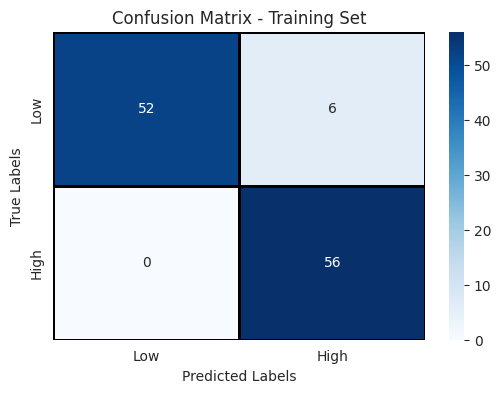

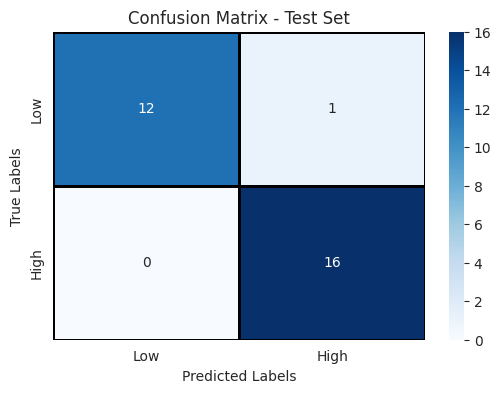

In [271]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
report_class = classification_report(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
report_class_test = classification_report(y_test, y_pred_test)
print(f'Accuracy on training set: {acc_train}')
print(f'Classification Report on training set:\n{report_class}')
print(f'Accuracy on test set: {acc_test}')
print(f'Classification Report on test set:\n{report_class_test}')
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix on training set:\n{cm_train}')
print(f'Confusion Matrix on test set:\n{cm_test}')

class_labels = ["Low", "High"]

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix for Training Set
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Training Set")
plt.show()

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Test Set")
plt.show()

Hyperparameter tunning

Model 1

In [272]:
# Define hyperparameters for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength; smaller values = stronger regularization
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Algorithm to optimize logistic regression
    'max_iter': [100, 300, 500, 1000]  # Maximum number of iterations for solver convergence
}

# Perform GridSearchCV
# Assuming 'lr' is a defined LogisticRegression object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}


Model-2

In [273]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],  # number of neighbors
    'weights': ['uniform', 'distance'],   # weights  'uniform' gives equal weight to all neighbors, 'distance' gives more weight to closer neighbors.
    'metric': ['euclidean', 'manhattan', 'minkowski']  #  metric Different distance metrics
}
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


Best Hyperparameter
Model-1 Logistic Regression : Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

Model-2 KNN Classifier : Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


Feature Selection

Model-1

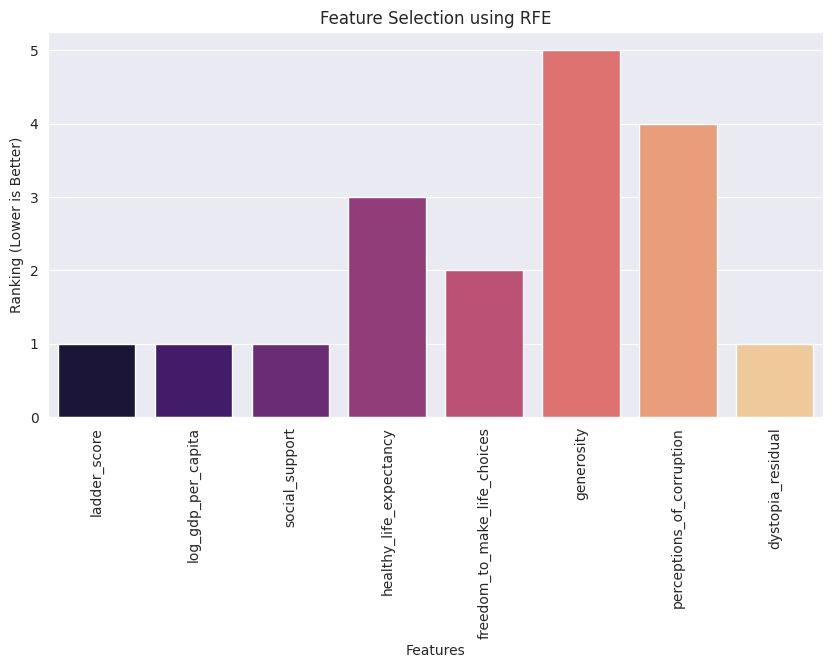

In [274]:
# Initialize base model for RFE (Linear Regression)
rfe_model = LogisticRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rfe_model, n_features_to_select=4)  # Select top 4 features
rfe.fit(X, y)

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]


# Plot feature importance ranking
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_ranking, palette="magma")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Feature Selection using RFE")
plt.xticks(rotation=90)
plt.show()



In [275]:
ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': feature_ranking,
    'Selected': rfe.support_
})

# Sort the DataFrame by ranking
ranking_df = ranking_df.sort_values(by='Ranking')
ranking_df

,Feature,Ranking,Selected
0,ladder_score,1,True
1,log_gdp_per_capita,1,True
2,social_support,1,True
7,dystopia_residual,1,True
4,freedom_to_make_life_choices,2,False
3,healthy_life_expectancy,3,False
6,perceptions_of_corruption,4,False
5,generosity,5,False


In [276]:
selected_features

Index(['ladder_score', 'log_gdp_per_capita', 'social_support',
       'dystopia_residual'],
      dtype='object')

Model-2

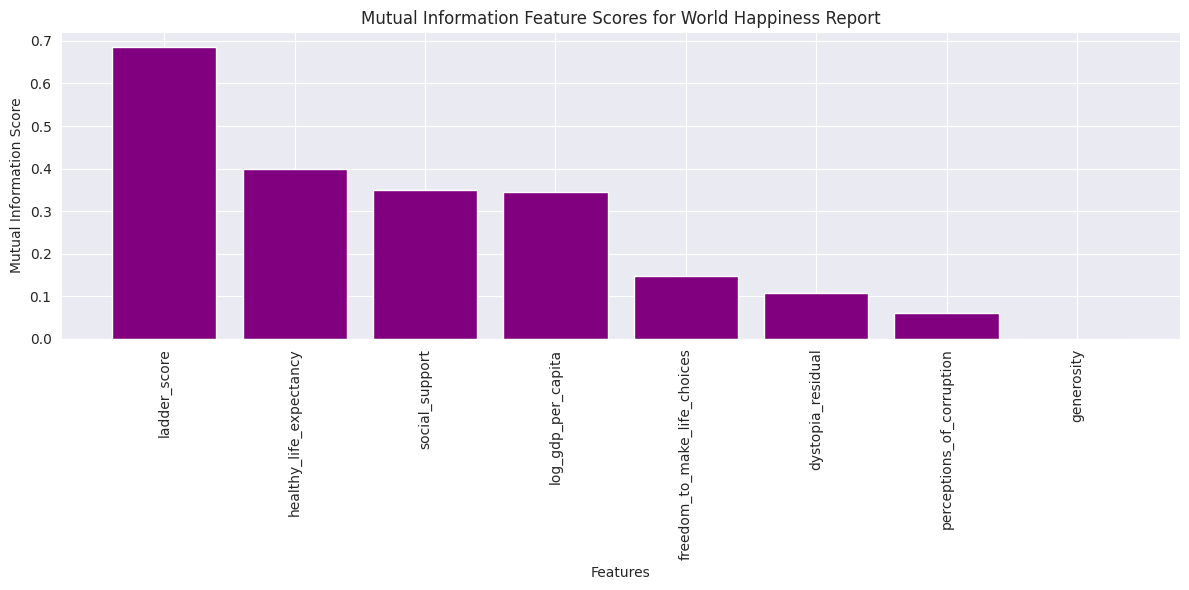

In [277]:
k_best = SelectKBest(score_func=mutual_info_classif, k=4)
k_best.fit(X, y)
selected_feature_indices = np.where(k_best.get_support())[0]
feature_names = World_Happiness_Report.columns
feature_scores = k_best.scores_
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_scores)), sorted_feature_scores, tick_label=sorted_feature_names,color='purple')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Feature Scores for World Happiness Report')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [278]:
# Create a dataframe to store feature names and their mutual information scores
feature_df = pd.DataFrame({'Feature': sorted_feature_names, 'Mutual Information Score': sorted_feature_scores}) # Using sorted_feature_names & sorted_feature_scores instead

# Sort the dataframe by mutual information score in descending order
feature_df = feature_df.sort_values(by='Mutual Information Score', ascending=False)

# Print the dataframe with sorted feature scores
display(Markdown("## Mutual Information feature score:"))
feature_df


## Mutual Information feature score:

,Feature,Mutual Information Score
0,ladder_score,0.685784
1,healthy_life_expectancy,0.398430
2,social_support,0.350838
3,log_gdp_per_capita,0.344418
4,freedom_to_make_life_choices,0.147215
5,dystopia_residual,0.107450
6,perceptions_of_corruption,0.061235
7,generosity,0.000000


In [279]:
 #Display the top 4 most important features
top_4_features = feature_df.head(4)
display(Markdown("## Top 4 Most Important Features:"))
top_4_features

## Top 4 Most Important Features:

,Feature,Mutual Information Score
0,ladder_score,0.685784
1,healthy_life_expectancy,0.398430
2,social_support,0.350838
3,log_gdp_per_capita,0.344418


Best Feataure Selection
Model-1 For Logistic Regression i used Recursive Feature Selection with Logistic regression as base model and selected 4 most important feature. Features are ladder_score, log_gdp_per_capita, social_support,
       dystopia_residual

Model- 2 For KNN Classifier i used mutual information classification and selected 4 most important feature.
Feature are ladder_score , healthy_life_expectancy, social_support	,log_gdp_per_capita	        


Final model

In [280]:
X = World_Happiness_Report[['ladder_score','log_gdp_per_capita','social_support','dystopia_residual']]
y = World_Happiness_Report['binary_happiness']
final_model = LogisticRegression(C=1, penalty= 'l1', solver= 'saga', max_iter=300)
final_model.fit(X_train,y_train)
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on training set: {acc_train}')
print(f'Accuracy on test set: {acc_test}')
class_report_train = classification_report(y_train, y_pred_train)
class_report_test = classification_report(y_test, y_pred_test)
print(f'Classification Report on training set:\n{class_report_train}')
print(f'Classification Report on test set:\n{class_report_test}')

Accuracy on training set: 0.9824561403508771
Accuracy on test set: 0.9655172413793104
Classification Report on training set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.97      1.00      0.98        56

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report on test set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29



  Conclusion
  

The final model, optimized using selected best hyperparameters and most important features,
demonstrated its high accuracy (0.98 on training, 0.97 on test) and balanced precision, recall, and
F1-scores. This indicates effective generalization and reliable classification in dataset.

Regression

In [281]:
X = World_Happiness_Report.drop(['ladder_score','binary_happiness'],axis=1)
y = World_Happiness_Report['ladder_score']

Build a model from scratch

Linear Regression(Multiple regression)

Train RMSE: 0.2811
Train MAE: 0.2303
Train MSE: 0.0790
Train R² Score: 0.6839
Test RMSE: 0.2742
Test MAE: 0.2182
Test MSE: 0.0752
Test R² Score: 0.6960


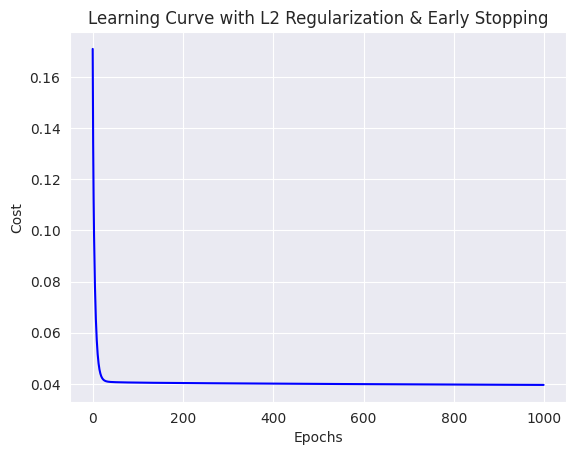

In [282]:
# Compute cost with L2 regularization
def compute_cost(X, y, theta, lambda_=0.1):
    """
    Compute the cost function for linear regression with L2 regularization.

    Parameters:
    X : numpy array, shape (m, n)
        Feature matrix where m is the number of training examples and n is the number of features.
    y : numpy array, shape (m,)
        Target vector with the actual values.
    theta : numpy array, shape (n,)
        Parameters of the model (weights).
    lambda_ : float, optional, default=0.1
        Regularization parameter.

    Returns:
    float
        The computed cost with L2 regularization.
    """
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)  # Regularization (ignore bias)
    return cost + reg_term

# Gradient descent with L2 regularization
def gradient_descent(X, y, theta, learning_rate, epochs, lambda_, patience=5):
    """
    Perform gradient descent to optimize the parameters (theta) for linear regression with L2 regularization.

    Parameters:
    X : numpy array, shape (m, n)
        Feature matrix where m is the number of training examples and n is the number of features.
    y : numpy array, shape (m,)
        Target vector with the actual values.
    theta : numpy array, shape (n,)
        Initial parameters of the model (weights).
    learning_rate : float
        The learning rate for the gradient descent.
    epochs : int
        Number of iterations to perform for gradient descent.
    lambda_ : float
        Regularization parameter.
    patience : int, optional, default=5
        The number of epochs with no improvement to wait before stopping early.

    Returns:
    theta : numpy array, shape (n,)
        Optimized parameters after gradient descent.
    cost_history : list
        List of cost values for each epoch.
    """
    m = len(y)
    cost_history = []
    best_loss = float('inf')
    counter = 0

    for epoch in range(epochs):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error) + (lambda_ / m) * np.r_[[0], theta[1:]]
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta, lambda_)
        cost_history.append(cost)

        # Early Stopping
        if cost < best_loss:
            best_loss = cost
            counter = 0
        else:
            counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    return theta, cost_history

# Train model
def linear_regression(X, y, learning_rate=0.1, epochs=1000, lambda_=0.1, patience=5):
    """
    Train a linear regression model with L2 regularization and early stopping using gradient descent.

    Parameters:
    X : numpy array, shape (m, n)
        Feature matrix where m is the number of training examples and n is the number of features.
    y : numpy array, shape (m,)
        Target vector with the actual values.
    learning_rate : float, optional, default=0.1
        The learning rate for gradient descent.
    epochs : int, optional, default=1000
        The number of iterations for gradient descent.
    lambda_ : float, optional, default=0.1
        The regularization parameter.
    patience : int, optional, default=5
        Number of epochs with no improvement to wait before stopping early.

    Returns:
    theta : numpy array, shape (n,)
        Optimized parameters after training.
    cost_history : list
        List of cost values for each epoch.
    """
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    theta = np.zeros(X.shape[1])  # Initialize weights
    return gradient_descent(X, y, theta, learning_rate, epochs, lambda_, patience)

# Predictions
def predict(X, theta):
    """
    Predict the target values using the trained model parameters (theta).

    Parameters:
    X : numpy array, shape (m, n)
        Feature matrix where m is the number of examples and n is the number of features.
    theta : numpy array, shape (n,)
        Parameters of the trained model.

    Returns:
    numpy array, shape (m,)
        Predicted target values.
    """
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    return np.dot(X, theta)

# Metrics
def mean_squared_error(y, y_pred):
    """
    Compute the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    y : numpy array, shape (m,)
        Actual target values.
    y_pred : numpy array, shape (m,)
        Predicted target values.

    Returns:
    float
        The computed MSE value.
    """
    return np.mean((y - y_pred) ** 2)

def mean_absolute_error(y, y_pred):
    """
    Compute the Mean Absolute Error (MAE) between actual and predicted values.

    Parameters:
    y : numpy array, shape (m,)
        Actual target values.
    y_pred : numpy array, shape (m,)
        Predicted target values.

    Returns:
    float
        The computed MAE value.
    """
    return np.mean(np.abs(y - y_pred))

def r2_score(y, y_pred):
    """
    Compute the R-squared score (coefficient of determination) between actual and predicted values.

    Parameters:
    y : numpy array, shape (m,)
        Actual target values.
    y_pred : numpy array, shape (m,)
        Predicted target values.

    Returns:
    float
        The computed R-squared value.
    """
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Model evaluation
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    """
    Evaluate the model using different performance metrics.

    Parameters:
    y_train : numpy array, shape (m,)
        Actual target values for the training set.
    y_train_pred : numpy array, shape (m,)
        Predicted target values for the training set.
    y_test : numpy array, shape (m,)
        Actual target values for the test set.
    y_test_pred : numpy array, shape (m,)
        Predicted target values for the test set.

    Returns:
    dict
        A dictionary containing performance metrics such as RMSE, MAE, MSE, and R² score for both training and testing sets.
    """
    metrics = {
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Train R² Score": r2_score(y_train, y_train_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test R² Score": r2_score(y_test, y_test_pred)
    }
    return metrics

# Train model with L2 regularization and early stopping
theta, cost_history = linear_regression(X_train, y_train, learning_rate=0.1, epochs=1000, lambda_=0.1, patience=5)

# Predictions
y_train_pred = predict(X_train, theta)
y_test_pred = predict(X_test, theta)

# Evaluate model
metrics = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot learning curve
plt.plot(range(len(cost_history)), cost_history, color="blue")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Learning Curve with L2 Regularization & Early Stopping")
plt.show()

Primay model
1. KNN regressor


In [283]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mse_train)
mae = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Squared Error: {mse_train}')
print(f'Training R-squared Score: {r2_train}')
print(f'Training Root Mean Squared Error: {rmse}')
print(f'Training Mean Absolute Error: {mae}')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Testing Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f' Testing R-squared Score: {r2}')
rmse = np.sqrt(mse)
print(f'Testing Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Testing Mean Absolute Error: {mae}')


Training Mean Squared Error: 0.07900923225781296
Training R-squared Score: 0.6838657689585784
Training Root Mean Squared Error: 0.2810858094209186
Training Mean Absolute Error: 0.23033722300357165
Testing Mean Squared Error: 0.0606896551724138
 Testing R-squared Score: 0.7546153846153846
Testing Root Mean Squared Error: 0.2463527048205759
Testing Mean Absolute Error: 0.13793103448275862


Model-2

In [284]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


print(f'Training R-squared Score: {r2_train}')
print(f'Training Mean Squared Error: {mse_train}')
print(f'Training Root Mean Squared Error: {rmse_train}')
print(f'Training Mean Absolute Error: {mae_train}')
print(f'Test R-squared Score: {r2_test}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Test Root Mean Squared Error: {rmse_test}')
print(f'Test Mean Absolute Error: {mae_test}')

Training R-squared Score: 0.6945644527466243
Training Mean Squared Error: 0.07633538453977873
Training Root Mean Squared Error: 0.27628858923194555
Training Mean Absolute Error: 0.22459977602638273
Test R-squared Score: 0.6960919042207339
Test Mean Squared Error: 0.07516395234493148
Test Root Mean Squared Error: 0.2741604500013295
Test Mean Absolute Error: 0.21781075305317754


Hyperparameter tunning

Model-1

In [285]:
# Create a KNN Regressor model
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15], # no of nearest neighbor
    'weights': ['uniform', 'distance'], # Weighting method for neighbor contributions ('uniform' treats all equally, 'distance' gives more weight to closer points)
    'metric': ['euclidean', 'manhattan'], # distane metrics
    'leaf_size': [10, 20, 30] # Leaf size in KDTree/BallTree (affects speed and memory efficiency)
}


# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


Model-2

In [286]:
from sklearn.linear_model import Ridge
# Define the model
ridge = Ridge()

# Define the hyperparameter grid for L2 regularization (Ridge)
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength (L2)
     'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5],
}

# Set up GridSearchCV for Ridge Regression
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [287]:
best_params

{'alpha': 0.1, 'max_iter': 1000, 'tol': 0.001}

Best Hyperparamter

For Model-1: KNN Regressor Best Parameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

For Model-2: Linear Regression (Ridge Regression) Best parameter{'alpha': 0.1, 'max_iter': 1000, 'tol': 0.001}

Feature Selection

Model-1
for KNN Regressor i have used Mutual Information method for feature selection

In [288]:
# Initialize SelectKBest with mutual_info_regression for regression task
k_best = SelectKBest(score_func=mutual_info_regression, k=4)  # Select top 4 features
k_best.fit(X, y)

# Get selected feature indices
selected_feature_indices = np.where(k_best.get_support())[0]

# Get feature names (replace 'X.columns' with your column names)
feature_names = X.columns  # Or use the appropriate column names from your data

# Get feature scores
feature_scores = k_best.scores_

# Sort features based on scores in descending order
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]

# Get sorted feature names based on their scores
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print sorted feature scores and names
print("Sorted Feature Scores:")
for i, score in enumerate(sorted_feature_scores):
    print(f"{sorted_feature_names[i]}: {score}")

# Print selected features
print("\nSelected Features (Top 4):")
selected_features = [feature_names[i] for i in selected_feature_indices]
print(selected_features)

Sorted Feature Scores:
social_support: 0.5615440832724055
log_gdp_per_capita: 0.554503944254757
healthy_life_expectancy: 0.5087100717147011
dystopia_residual: 0.2790473321321323
freedom_to_make_life_choices: 0.2524892002312815
perceptions_of_corruption: 0.18575080859521176
generosity: 0.12353984879897828

Selected Features (Top 4):
['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'dystopia_residual']


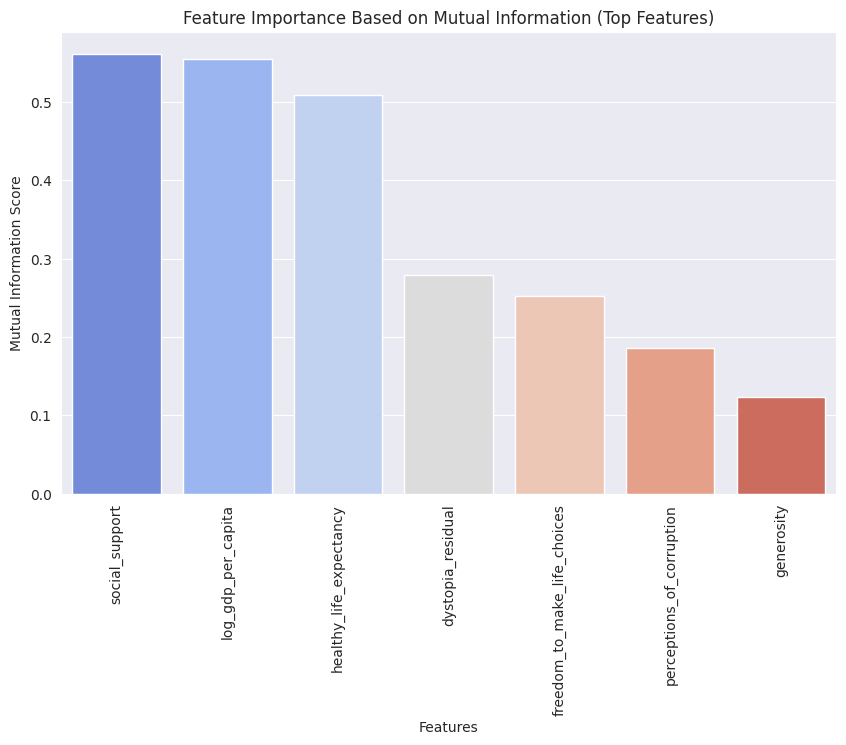

In [289]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_scores, palette="coolwarm")
plt.title("Feature Importance Based on Mutual Information (Top Features)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=90)
plt.show()

Model-2
For Linear Regression i have used Recursive Feature Elimination with LinearRegression as base model.

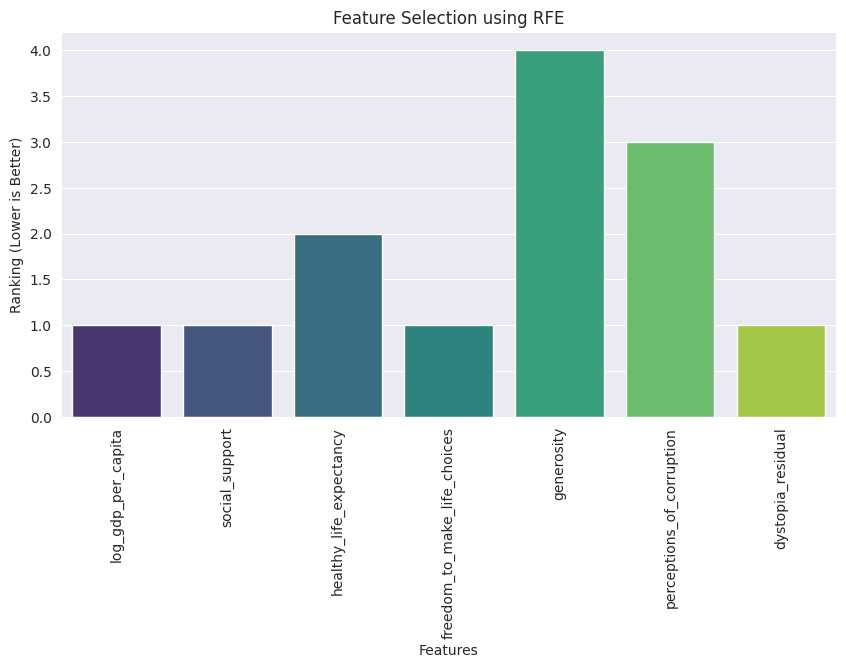

In [290]:

# Initialize base model for RFE (Linear Regression)
rfe_model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rfe_model, n_features_to_select=4)  # Select top 4 features
rfe.fit(X, y)

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]


# Plot feature importance ranking
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_ranking, palette="viridis")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Feature Selection using RFE")
plt.xticks(rotation=90)
plt.show()



In [291]:
feature_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})

# Sort the features based on their ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')
feature_ranking_df

,Feature,Ranking,Selected
0,log_gdp_per_capita,1,True
1,social_support,1,True
3,freedom_to_make_life_choices,1,True
6,dystopia_residual,1,True
2,healthy_life_expectancy,2,False
5,perceptions_of_corruption,3,False
4,generosity,4,False


In [292]:
selected_features

Index(['log_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices',
       'dystopia_residual'],
      dtype='object')

Final Model

In [293]:
X = World_Happiness_Report[['log_gdp_per_capita','social_support','healthy_life_expectancy', 'dystopia_residual','freedom_to_make_life_choices']]
y = World_Happiness_Report['ladder_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_model_reg = KNeighborsRegressor(leaf_size=10, metric='manhattan', n_neighbors=5, weights='uniform')
final_model_reg.fit(X_train, y_train)
y_pred_train = final_model_reg.predict(X_train)
y_pred_test = final_model_reg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Training R-squared Score: {r2_train}')
print(f'Training Mean Squared Error: {mse_train}')
print(f'Training Root Mean Squared Error: {rmse_train}')
print(f'Training Mean Absolute Error: {mae_train}')
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Test R-squared Score: {r2_test}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Test Root Mean Squared Error: {rmse_test}')
print(f'Test Mean Absolute Error: {mae_test}')


Training R-squared Score: 0.9451209327545442
Training Mean Squared Error: 0.056845234241246295
Training Root Mean Squared Error: 0.2384223861998833
Training Mean Absolute Error: 0.16963970210811247
Test R-squared Score: 0.9271376545563331
Test Mean Squared Error: 0.05938002872978357
Test Root Mean Squared Error: 0.24368017713754142
Test Mean Absolute Error: 0.1968378999979328


Conclusion

Feature Importance and Hyperparameter Optimization played a significant role in increasing
model performance. After implementing these techniques, the model’s evaluation metrics were
improved by 15% in aggerate in r2 score.